# Objective :

"Predict the heart disease. You can analyze all the data related to heart disease to minimize the chances of heart disease "

# Step 1 :  Import Library and Dataset

In [4]:
import pandas as pd
import numpy as np

In [5]:
new = pd.read_excel(r"C:\Users\Ajinkya\Desktop\PYTHON\Machine Learning\Logistics Regression-20230223T092351Z-001\Logistics Regression\heart disease.xlsx")
new

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,ECG,MaxHR,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,2,0
1,49,1,2,160,180,0,0,156,1,1
2,37,0,1,130,283,0,1,98,2,0
3,48,1,0,138,214,0,0,108,1,1
4,54,0,2,150,195,0,0,122,2,0
...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,1,1
914,68,0,0,144,193,1,0,141,1,1
915,57,0,0,130,131,0,0,115,1,1
916,57,1,1,130,236,0,2,174,1,1


# Step 2 : Data Pre-Processing

### Univariate Analysis

In [6]:
new.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,ECG,MaxHR,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,2,0
1,49,1,2,160,180,0,0,156,1,1
2,37,0,1,130,283,0,1,98,2,0
3,48,1,0,138,214,0,0,108,1,1
4,54,0,2,150,195,0,0,122,2,0


In [7]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            918 non-null    int64
 1   Sex            918 non-null    int64
 2   ChestPainType  918 non-null    int64
 3   RestingBP      918 non-null    int64
 4   Cholesterol    918 non-null    int64
 5   FastingBS      918 non-null    int64
 6   ECG            918 non-null    int64
 7   MaxHR          918 non-null    int64
 8   ST_Slope       918 non-null    int64
 9   HeartDisease   918 non-null    int64
dtypes: int64(10)
memory usage: 71.8 KB


In [8]:
new.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,ECG,MaxHR,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,0.781046,132.396514,198.799564,0.233115,0.603486,136.809368,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.805968,25.460334,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,173.250000,0.000000,0.000000,120.000000,1.000000,0.000000
50%,54.000000,0.000000,0.000000,130.000000,223.000000,0.000000,0.000000,138.000000,1.000000,1.000000
75%,60.000000,0.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,2.000000,1.000000


In [9]:
# Do we have NA's in data
new.isna().sum()

Age              0
Sex              0
ChestPainType    0
RestingBP        0
Cholesterol      0
FastingBS        0
ECG              0
MaxHR            0
ST_Slope         0
HeartDisease     0
dtype: int64

### Checking Missing Value

<AxesSubplot:>

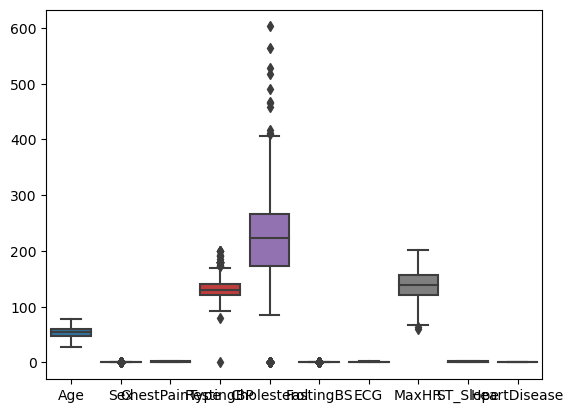

In [10]:
import seaborn as sns
sns.boxplot(data = new)

In [11]:
for i in new:
    q1 = new[i].quantile(0.25)
    q3 = new[i].quantile(0.75)
    iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
    upper_limit = q3+1.5*iqr #acceptable range
    lower_limit = q1-1.5*iqr
    new[i]=np.where(new[i]>upper_limit,upper_limit,new[i])
    new[i]=np.where(new[i]<lower_limit,lower_limit,new[i])
    if type(i)==str:
        continue

<AxesSubplot:>

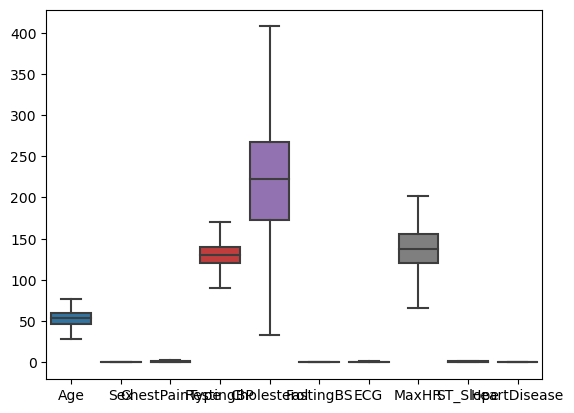

In [12]:
sns.boxplot(data = new)

In [13]:
new.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,ECG,MaxHR,ST_Slope,HeartDisease
0,40.0,0.0,1.0,140.0,289.0,0.0,0.0,172.0,2.0,0.0
1,49.0,0.0,2.0,160.0,180.0,0.0,0.0,156.0,1.0,1.0
2,37.0,0.0,1.0,130.0,283.0,0.0,1.0,98.0,2.0,0.0
3,48.0,0.0,0.0,138.0,214.0,0.0,0.0,108.0,1.0,1.0
4,54.0,0.0,2.0,150.0,195.0,0.0,0.0,122.0,2.0,0.0


In [14]:
new.HeartDisease.value_counts(ascending=False)

1.0    508
0.0    410
Name: HeartDisease, dtype: int64

# Heart Disease Rate Analysis

In [37]:
import plotly.express as px

fig = px.pie(new,names='HeartDisease',color='HeartDisease',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

#### Conclusion from above pie chart 44.7% people don't have Heart related Disease while 55.3% have Heart related Disease

# Step 3: Model Building

In [16]:
new.select_dtypes(include=[np.number]).columns.tolist()

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'ECG',
 'MaxHR',
 'ST_Slope',
 'HeartDisease']

In [17]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = new.drop(['HeartDisease'],axis=1)
y = new[['HeartDisease']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=231)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train) # model

C:\Users\Ajinkya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Ajinkya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [19]:
output.intercept_  # beto 

array([0.73806621])

In [20]:
output.coef_  # Beta 1 -- 

array([[ 0.04986412,  0.        , -0.8365287 ,  0.01622456, -0.0047544 ,
         0.        , -0.05210837, -0.0061658 , -1.9398017 ]])

In [21]:
output.feature_names_in_

array(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'ECG', 'MaxHR', 'ST_Slope'], dtype=object)

In [22]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,ECG,MaxHR,ST_Slope,HeartDisease
52,45.0,0.0,1.0,140.0,224.000,0.0,0.0,122.0,2.0,0.0
406,57.0,0.0,0.0,140.0,32.625,0.0,0.0,100.0,1.0,1.0
855,68.0,0.0,2.0,170.0,274.000,0.0,2.0,150.0,1.0,1.0
619,74.0,0.0,1.0,120.0,269.000,0.0,2.0,121.0,2.0,0.0
224,55.0,0.0,1.0,120.0,256.000,0.0,0.0,137.0,2.0,0.0


# Step 4 : Predictions on Train Dataset

In [23]:
train['Probability']= output.predict_proba(X_train)[:,1]  # MODEL = dt
train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,ECG,MaxHR,ST_Slope,HeartDisease,Probability
52,45.0,0.0,1.0,140.0,224.000,0.0,0.0,122.0,2.0,0.0,0.217558
406,57.0,0.0,0.0,140.0,32.625,0.0,0.0,100.0,1.0,1.0,0.958523
855,68.0,0.0,2.0,170.0,274.000,0.0,2.0,150.0,1.0,1.0,0.719574
619,74.0,0.0,1.0,120.0,269.000,0.0,2.0,121.0,2.0,0.0,0.384525
224,55.0,0.0,1.0,120.0,256.000,0.0,0.0,137.0,2.0,0.0,0.205800


In [24]:
train['Prediction']=output.predict(X_train)  # MODEL = dt
train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,ECG,MaxHR,ST_Slope,HeartDisease,Probability,Prediction
52,45.0,0.0,1.0,140.0,224.000,0.0,0.0,122.0,2.0,0.0,0.217558,0.0
406,57.0,0.0,0.0,140.0,32.625,0.0,0.0,100.0,1.0,1.0,0.958523,1.0
855,68.0,0.0,2.0,170.0,274.000,0.0,2.0,150.0,1.0,1.0,0.719574,1.0
619,74.0,0.0,1.0,120.0,269.000,0.0,2.0,121.0,2.0,0.0,0.384525,0.0
224,55.0,0.0,1.0,120.0,256.000,0.0,0.0,137.0,2.0,0.0,0.205800,0.0


# Step 5 : Model Performance Metrics

In [25]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Prediction'],train['HeartDisease'])
print(matrix)

[[221  55]
 [ 57 309]]


### Final accuracy of Model Before Pruning 

In [26]:
Accuracy_Train=((221+309)/(642)*100)
print(Accuracy_Train)   # overfit or High accuracy

82.55451713395638


In [27]:
from sklearn.metrics import classification_report
print(classification_report(train['HeartDisease'], train['Prediction']))

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80       278
         1.0       0.84      0.85      0.85       364

    accuracy                           0.83       642
   macro avg       0.82      0.82      0.82       642
weighted avg       0.83      0.83      0.83       642



In [28]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y_train, output.predict(X_train))
logit_roc_auc

0.8219325638390387

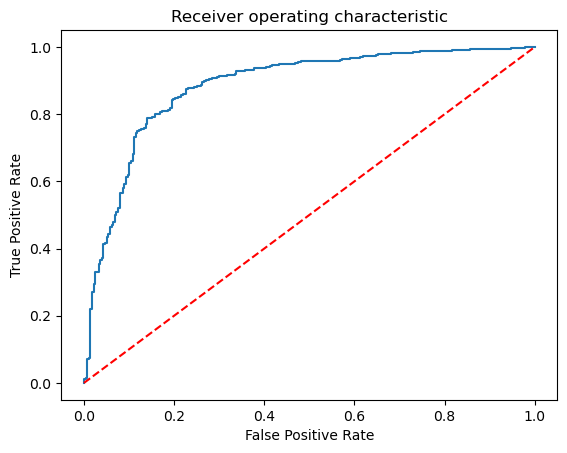

In [29]:
logit_roc_auc = roc_auc_score(y_train, output.predict(X_train))
fpr, tpr, thresholds= roc_curve(y_train, output.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)'
         % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

# Step 6 : Predictions on Test Dataset

In [30]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,ECG,MaxHR,ST_Slope,HeartDisease
334,51.0,0.0,0.0,130.0,32.625,0.0,0.0,170.0,2.0,1.0
39,48.0,0.0,0.0,150.0,227.000,0.0,0.0,130.0,1.0,0.0
902,58.0,0.0,1.0,125.0,220.000,0.0,0.0,144.0,1.0,0.0
651,61.0,0.0,0.0,140.0,207.000,0.0,2.0,138.0,2.0,1.0
538,54.0,0.0,0.0,130.0,202.000,0.0,0.0,112.0,1.0,1.0


In [31]:
test['Predicted']=output.predict(X_test)
test.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,ECG,MaxHR,ST_Slope,HeartDisease,Predicted
334,51.0,0.0,0.0,130.0,32.625,0.0,0.0,170.0,2.0,1.0,1.0
39,48.0,0.0,0.0,150.0,227.000,0.0,0.0,130.0,1.0,0.0,1.0
902,58.0,0.0,1.0,125.0,220.000,0.0,0.0,144.0,1.0,0.0,1.0
651,61.0,0.0,0.0,140.0,207.000,0.0,2.0,138.0,2.0,1.0,1.0
538,54.0,0.0,0.0,130.0,202.000,0.0,0.0,112.0,1.0,1.0,1.0


# Step 7 : Model Performance Metrics on Test data 

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['HeartDisease'])
print(confusion_matrix)

[[102  22]
 [ 30 122]]


In [33]:
Accuracy_test=((102+122)/(276)*100)
Accuracy_test

81.15942028985508

# Sensitivity & Specificity

In [34]:
from sklearn.metrics import classification_report
print(classification_report(test['HeartDisease'], test['Predicted']))

              precision    recall  f1-score   support

         0.0       0.82      0.77      0.80       132
         1.0       0.80      0.85      0.82       144

    accuracy                           0.81       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.81      0.81      0.81       276



* 85% is accuracy that there is Heart Disease capture by model 
* 77% is accuracy that there is no Heart Disease capture by model 